<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ivnlee/blob/main/Actividades_Semanales/Semana_6/Semana6_Repaso_reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Semana 6: Actividad 1** - Repaso Transformación y reducción de dimensiones

**Iván Lee Cancino - A01793491**

### **TC4029 - Ciencia y Analítica de Datos**

**Prof. María de la Paz Rico Fernández**

**Prof. Julio César Galindo López**


*27-Oct-2022*
_ _ _ 
_ _ _

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposicion
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------

B = np.dot(W, np.dot(D, Winv))  

print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


### **Inicio de Ejercicio 1**

* En este ejercicio realizamos la descomposición de la matriz original usando la función **eig** de Numpy, obteniendo los Eigenvalues y Eigenvectors.

* Posteriormente se realiza la reconstrucción de la matriz mediante la multiplicación (dot product) de la matriz de eigen vectores **W** la diagonal de eigen valores **D** y la matriz inversa de **W**.

* La matriz original se puede interpretar como la matriz de covarianza que utilizaríamos para realizar un PCA, de la cual previamente hemos hecho una estandarización para centrar sus datos.

* El valor absoluto de los Eigenvalues representa el peso o importancia con la que contribuyen para el calculo de cada PC. 

In [ ]:
#Matriz 1

# Importamos modulo para multiplicar matrices
from numpy.linalg import multi_dot 

A1 = np.array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])

print("-------Matriz original-------")
print(A1)
print("\n","-----------------------------")

# calcula la eigendescomposicion

values_1, vectors_1 = eig(A1)

# metodo .real regresa solo numeros reales, descarta parte imaginaria 
print("Eigenvalues""\n",values_1.real,"\n") #D1 
print("Eigenvectors""\n",vectors_1.real) #W1

# Reconstrucción

values_1, vectors_1 = np.linalg.eig(A1) 
W1 = vectors_1
W1inv = np.linalg.inv(W1)
D1 = np.diag(values_1)

print("\n""Matriz diagonal""\n", D1.real)
print("\n""Matriz inversa""\n", W1inv.real)

#reconstruye la matriz 
print("\n","-------Matriz reconstruida-------")

B1 = np.linalg.multi_dot([W1, D1, W1inv])    

print(B1.real.round(2)) 
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]

 -----------------------------
Eigenvalues
 [3.54451153 0.22774424 0.22774424] 

Eigenvectors
 [[-0.80217543 -0.04746658 -0.04746658]
 [-0.55571339  0.86167879  0.86167879]
 [-0.21839689 -0.16932106 -0.16932106]]

Matriz diagonal
 [[3.54451153 0.         0.        ]
 [0.         0.22774424 0.        ]
 [0.         0.         0.22774424]]

Matriz inversa
 [[-0.95827338 -0.1739303  -0.61649796]
 [-0.30900456  0.52417711 -0.19879576]
 [-0.30900456  0.52417711 -0.19879576]]

 -------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------


In [ ]:
#Matriz 2
A2 = np.array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])

print("-------Matriz original-------")
print(A2)
print("\n","-----------------------------")

# calcula la eigendescomposicion

values_2, vectors_2 = eig(A2)
print("Eigenvalues""\n",values_2,"\n") #D2
print("Eigenvectors""\n",vectors_2) #W2


# Reconstrucción

values_2, vectors_2 = np.linalg.eig(A2)                                
W2 = vectors_2
W2inv = np.linalg.inv(W2)
D2 = np.diag(values_2)

print("\n""Matriz diagonal""\n", D2)
print("\n""Matriz inversa""\n", W2inv)

#reconstruye la matriz 
print("\n","-------Matriz reconstruida-------")

B2 = np.linalg.multi_dot([W2, D2, W2inv])  

print(B2.round(2))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]

 -----------------------------
Eigenvalues
 [ 3. -2.  1.] 

Eigenvectors
 [[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]

Matriz diagonal
 [[ 3.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  1.]]

Matriz inversa
 [[ 0.72111026  0.72111026  2.88444102]
 [-0.56568542  0.84852814  1.50849447]
 [ 0.          0.          3.14466038]]

 -------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [ ]:
#Matriz 3
A3 = np.array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])

print("-------Matriz original-------")
print(A3)
print("\n","-----------------------------")

# calcula la eigendescomposicion

values_3, vectors_3 = eig(A3)
print("Eigenvalues""\n",values_3,"\n") #D3
print("Eigenvectors""\n",vectors_3) #W3

# Reconstrucción

values_3, vectors_3 = np.linalg.eig(A3)                                
W3 = vectors_3
W3inv = np.linalg.inv(W3)
D3 = np.diag(values_3)

print("\n""Matriz diagonal""\n", D3)
print("\n""Matriz inversa""\n", W3inv)

#reconstruye la matriz 
print("\n","-------Matriz reconstruida-------")

B3 = np.linalg.multi_dot([W3, D3, W3inv])   
  
print(B3.round(2))  
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]

 -----------------------------
Eigenvalues
 [ 6.89167094 -0.214175   -0.67749594] 

Eigenvectors
 [[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]

Matriz diagonal
 [[ 6.89167094  0.          0.        ]
 [ 0.         -0.214175    0.        ]
 [ 0.          0.         -0.67749594]]

Matriz inversa
 [[ 1.57159201  1.10218456  0.18707504]
 [ 3.67287466  2.64661304 -2.17976243]
 [-2.90368638 -3.32287499  1.98085426]]

 -------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


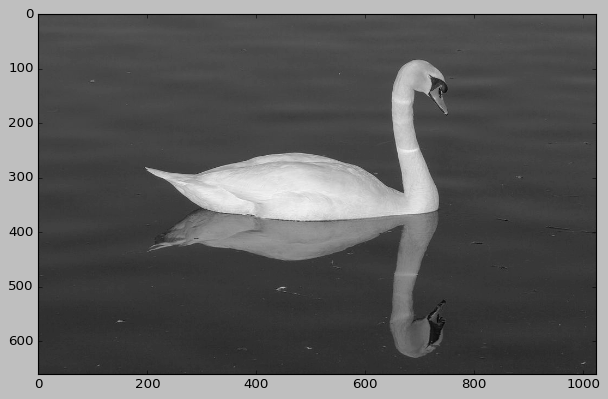

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F8BA73E74D0>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

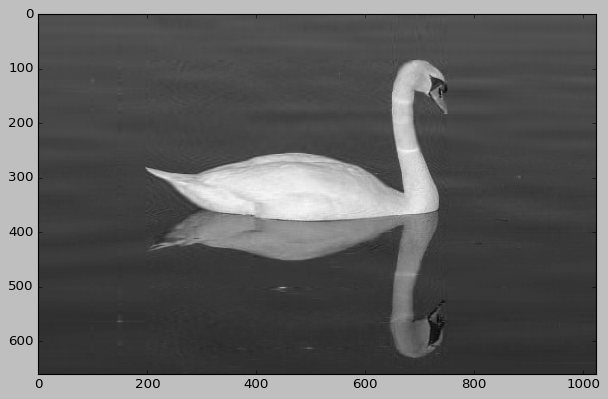

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.figure(figsize=(9,6))
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

### **Inicio de Ejercicio 2** 

* Una imagen digital se puede representar como una matriz (2D) en la que cada elemento de la matriz representa un pixel. 

    Para el caso de una imagen en escala de grises de 8-bits, cada pixel puede tener un valor o intensidad que va desde 0 hasta 255, en donde 0=negro y 255=blanco.

* SVD nos ayuda a reducir dimensiones aún y cuando nuestra matriz de entrada no sea cuadrada (**n x n**), es decir puede ser de forma **n x m**. Esto a diferencia de la descomposición en PCA donde la matriz de covarianza siempre es cuadrada (**n x n**).

[110. 110. 110. ...  27.  27.  27.]


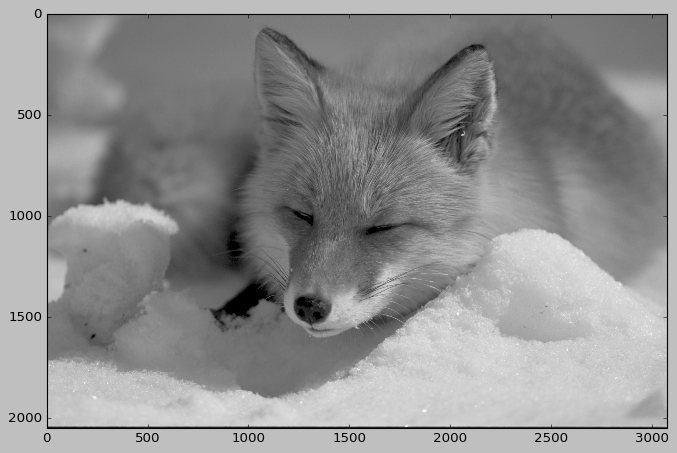

<PIL.Image.Image image mode=LA size=3072x2048 at 0x7F8BA73F2410>


In [ ]:
#imagen 1
plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/0/03/Vulpes_vulpes_laying_in_snow.jpg')).convert('LA')

imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(10,7))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1) 


 (2048, 3072)
(2048, 2048)
(3072, 3072) 



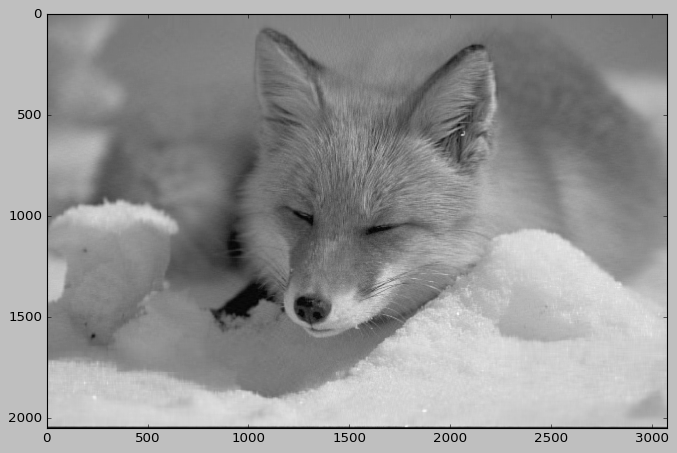

In [ ]:
nvalue1 = 100

U1,D1,V1 = np.linalg.svd(imgmat1)

reconstimg1 = np.matrix(U1[:,:nvalue1])*np.diag(D1[:nvalue1])*np.matrix(V1[:nvalue1,:])

print("\n", imgmat1.shape)
print(U1.shape)
print(V1.shape, "\n")

#2048x3072= U(2048X2048)D(2048x3072)V(3072x3072)
        #=U(2048Xnvalues)D(nvaluesXnvalue)V(nvaluesx3072)

        #=U(2048X100)(100X100)(100X3072)

plt.figure(figsize=(10,7)) 
plt.imshow(reconstimg1,cmap='gray')
plt.show()

* **Imagen 1:** Observamos que con 100 valores de los 2048, la imagen ya se ve muy parecida a la original.
  - La operación de reconstruccion de la matriz se reduce de (2048X2048)(2048x3072)(3072x3072) a (2048X**100)(100X100)(100**X3072)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[ 81.  81.  81. ... 113. 113. 113.]


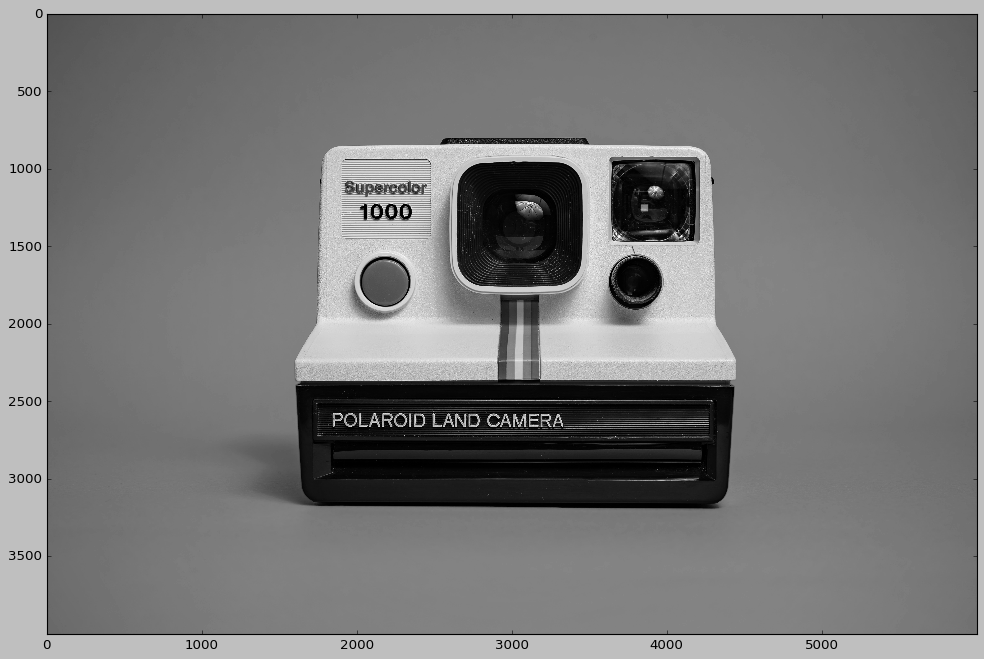

<PIL.Image.Image image mode=LA size=6000x4000 at 0x7F8BAB6F0F50>


In [ ]:
#imagen 2
plt.style.use('classic')
img2 = Image.open('/content/drive/MyDrive/TC4029Data_Science/polaroid_cam.jpg').convert('LA')

imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(15,15))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2) 


 (4000, 6000)
(4000, 4000)
(6000, 6000) 



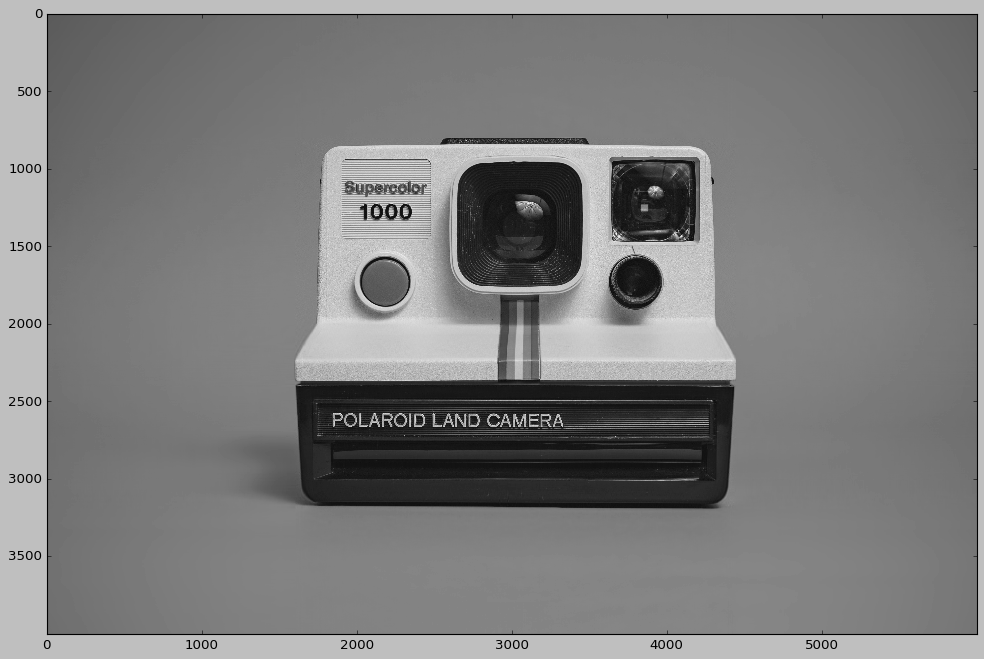

In [ ]:
nvalue2 = 400

U2,D2,V2 = np.linalg.svd(imgmat2)

reconstimg2 = np.matrix(U2[:,:nvalue2])*np.diag(D2[:nvalue2])*np.matrix(V2[:nvalue2,:])

print("\n", imgmat2.shape)
print(U2.shape)
print(V2.shape, "\n")


#4000x6000= U(4000X4000)D(4000x6000)V(6000x6000)
        #=U(4000Xnvalues)D(nvaluesXnvalue)V(nvaluesx6000)

        #=U(4000X400)(400X400)(400X6000)

plt.figure(figsize=(15,15)) 
plt.imshow(reconstimg2,cmap='gray')
plt.show()

* **Imagen 2:** Para esta imagen probamos con 400 valores de los 4000 originales, obsevando una imagen aceptable con respecto a la original.
  - La operación de reconstruccion de la matriz se reduce de (4000X4000) (4000x6000) (6000x6000) a (4000X**400) (400X400) (400**X6000)

[ 53.  53.  53. ... 111. 114. 115.]


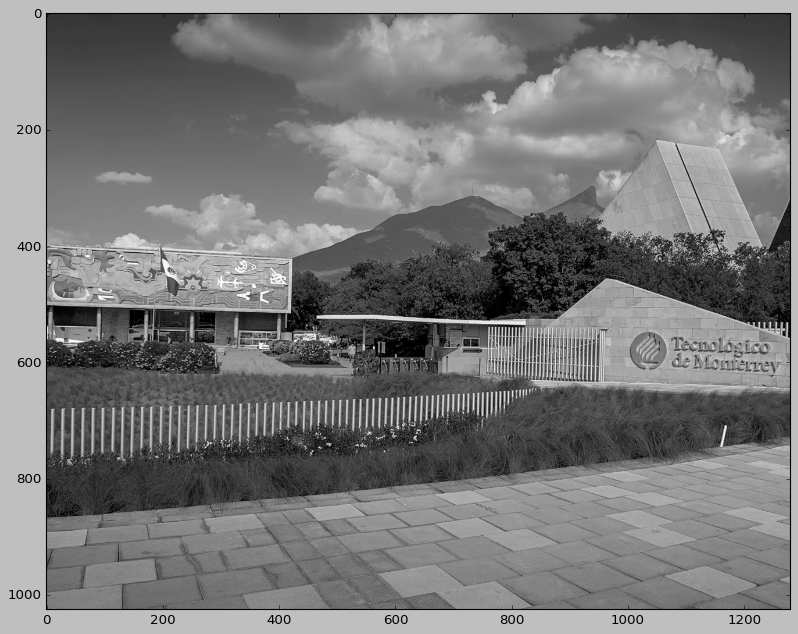

<PIL.Image.Image image mode=LA size=1280x1024 at 0x7F8BA47D44D0>


In [ ]:
#imagen 3
plt.style.use('classic')
img3 = Image.open('/content/drive/MyDrive/TC4029Data_Science/tec_mty.jpeg').convert('LA')

imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(12,10))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img3) 


 (1024, 1280)
(1024, 1024)
(1280, 1280) 



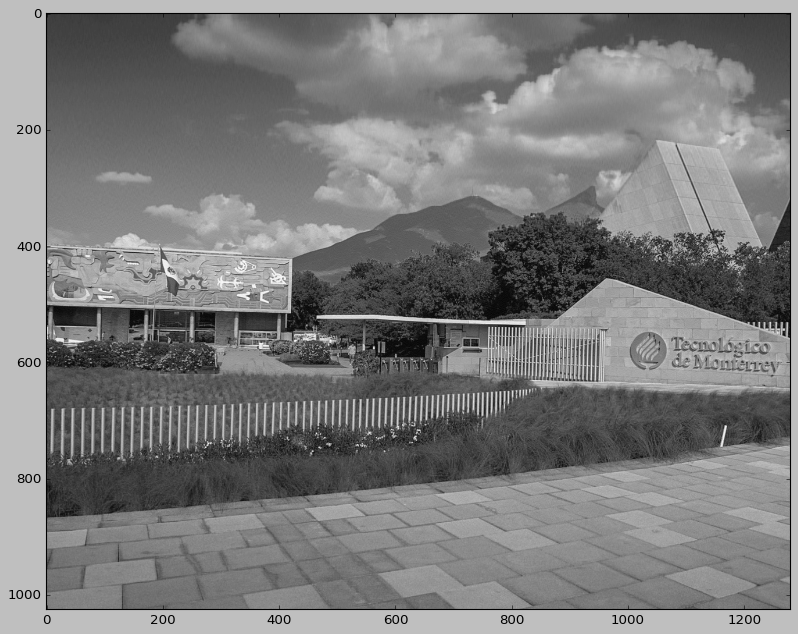

In [ ]:
nvalue3 = 300

U3,D3,V3 = np.linalg.svd(imgmat3)

reconstimg3 = np.matrix(U3[:,:nvalue3])*np.diag(D3[:nvalue3])*np.matrix(V3[:nvalue3,:])

print("\n", imgmat3.shape)
print(U3.shape)
print(V3.shape, "\n")

#1024x1280= U(1024X1024)D(1024x1280)V(1280x1280)
        #=U(21024Xnvalues)D(nvaluesXnvalue)V(nvaluesx1280)

        #=U(1024X300)(300X300)(300X1280)

plt.figure(figsize=(12,10)) 
plt.imshow(reconstimg3,cmap='gray')
plt.show()

* **Imagen 3:** En esta imagen utilizamos 300 valores de los 1024 originales y observamos una imagen compromida muy parecida a la original.
  - La operación de reconstruccion de la matriz se reduce de (1024X1024) (1024x1280) (1280x1280) a (1024X**300) (300X300) (300**X1280)

# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

### **Inicio de Ejercicio 3** 

In [ ]:
#tu codigo aqui

from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
    
print(pd.DataFrame(X))  


       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


* Revisamos rapidamente la estadistica descriptiva de los datos:

In [ ]:
pd.DataFrame(X).describe().round(4)

,0,1,2,3
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0573,3.7580,1.1993
std,0.8281,0.4359,1.7653,0.7622
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


* A continuación se realiza la estandarización de los datos usando la función **StandardScaler** de Scikit-learn. 

    Como hemos visto, para realizar el PCA es necesario que todos los valores de nuestro dataset estén en una misma escala para evitar que se le asigne mayor importancia a los valores cuya esacala de medición sea mayor. 

In [ ]:
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pd.DataFrame(X).describe().round(4)

,0,1,2,3
count,150.0000,150.0000,150.0000,150.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000
std,1.0034,1.0034,1.0034,1.0034
min,-1.8700,-2.4339,-1.5676,-1.4471
25%,-0.9007,-0.5924,-1.2266,-1.1838
50%,-0.0525,-0.1320,0.3365,0.1325
75%,0.6745,0.5586,0.7628,0.7907
max,2.4920,3.0908,1.7858,1.7121


* A continuación se realiza el PCA calculando solo los primeros 2 componentes principales (n_components = 2).

In [ ]:
# The PCA model
pca = PCA(n_components = 2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA

Revisamos la descomposición de eigenvalues y eigenvectors:

In [ ]:
print('Eigenvalues:''\n', pca.explained_variance_)
print('\n''Eigenvectors:''\n', pca.components_.T)   

Eigenvalues:
 [2.93808505 0.9201649 ]

Eigenvectors:
 [[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]


* Graficamos los datos antes y despúes del PCA:

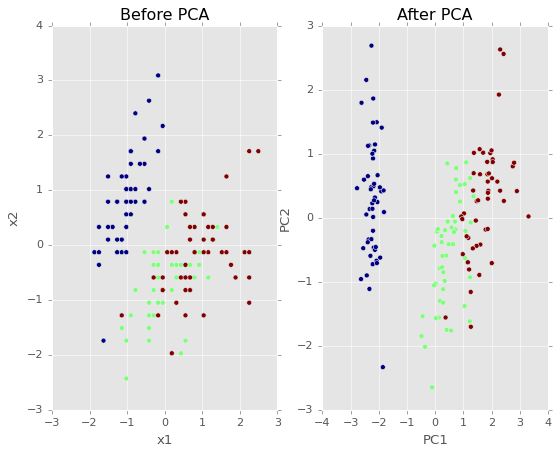

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show() 

* Revisamos el porcentaje de varianza explicada por el PC1 y PC2:

In [ ]:
# % de Varianza explicada por PC1 y PC2
print(pca.explained_variance_ratio_ * 100)  

[72.96244541 22.85076179]


* En este ejercicio el tamaño del dataset es de 150x4, por lo que con solo los dos primeros PCs capturamos casi el 96% de la varianza total

Revisamos la matriz de covarianza de los PCs:

In [ ]:
# Matriz de covarianza (Valores en la diagonal)
np.cov(X_new.T).round(4) 

array([[2.9381, 0.    ],
       [0.    , 0.9202]])

In [ ]:
# Corresponde a los eigenvalues
pca.explained_variance_ 

array([2.93808505, 0.9201649 ])

Entre mayor sea el valor absoluto del coeficiente, mayor será su importancia para el PC correspondiente:

In [ ]:
print(abs( pca.components_.T))  

[[0.52106591 0.37741762]
 [0.26934744 0.92329566]
 [0.5804131  0.02449161]
 [0.56485654 0.06694199]]


Para el PC1 (primer columna), vemos que las variables 3, 4 y 1 son las que mas contribuyen. 

Para el PC2 las variables que mas contribuyen son la 2 y 1.  

In [ ]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
      score: the projected data
      coeff: the eigenvectors (PCs)
      y: the class labels
    '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
      plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
#plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
      plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
      plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)
      plt.xlabel("PC{}".format(1), size=14)
      plt.ylabel("PC{}".format(2), size=14)
      limx= int(xs.max()) + 1
      limy= int(ys.max()) + 1
      plt.xlim([-limx,limx])
      plt.ylim([-limy,limy])
      plt.grid()
      plt.tick_params(axis='both', which='both', labelsize=14)

**Gráfica Biplot**

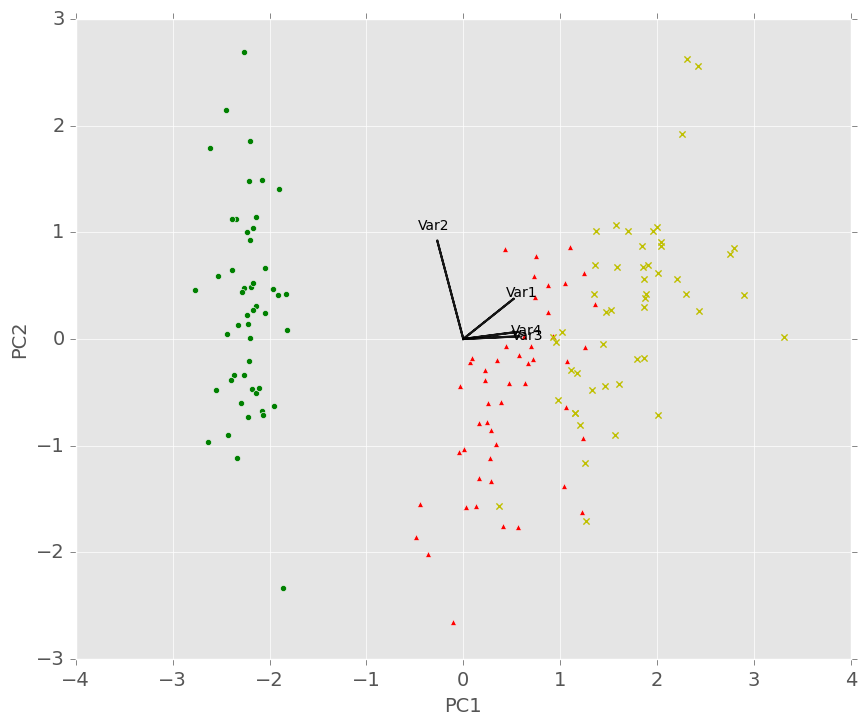

In [ ]:
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y) 
plt.show()

* En la gráfica anterior comprobamos rápidamente las variables mas importantes para PC1 y PC2 y se observa también la varianza de los datos a lo largo de cada PC. 

Finalmente revisamos la covarianza entre variables:
  - Var3 y Var4 tienen alta correlación positiva
  - Var2 y Var3 tienen correlación negativa

In [ ]:
# Var 3 and Var 4 are extremely positively correlated
print(np.corrcoef(X[:,2], X[:,3])[1,0])

#Var 2 and Var 3 are negatively correlated
print(np.corrcoef(X[:,1], X[:,2])[1,0]) 

0.9628654314027957
-0.42844010433054014


### **¿Qué es feature importance y para que nos sirve?**

Recordemos que el objetivo de PCA es reducir la cantidad de variables del dataset tratando de minimizar la perdida de información. Feature importance se refiere a extraer las variables o atributos más importantes del dataset en términos de varianza. Podremos tener variables con alta correlación entre sí que se pueden considerar como redundantes para la variable dependiente y por lo tanto podríamos descartar algunas para reducir el tamaño de los datos y hacer más manejable nuestro modelo. 

Los atributos mas importantes son los de valor absoluto mayor en la matriz de eigenvectors, en donde cada columna de la matriz representa un PC.

### **¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Durante el PCA se encontró que los primeros dos PC capturan casi el 96% de la varianza total, (en este caso hay que tomar en cuenta que el dataset es muy pequeño como vimos al inicio), por lo que se pudo reducir a la mitad con poca perdida de información. 
Para el PC1 las variables var3 var4 y var1 son las mas importantes como se puede ver rápidamente en la grafica "biplot", mientras que para el PC2 las variables mas importantes resultaron ser var2 y var1. 

También resulta relevante para entender mejor el PCA que estamos aplicando las mismas operaciones de matrices como en el ejercicio 1. Durante el análisis comprobamos que la matriz de covarianza de los PCs guardan los eigenvalues de la covarianza original.   

### **¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

Después de este ejercicio queda más clara la utilidad de un PCA como técnica para reducir dimensiones cuando tenemos un conjunto de datos con muchas variables. Reducir dimensiones es de utilidad para facilitar la visualización de nuestros datos y entenderlos mejor, así como para tener un mejor modelo para aplicar algoritmos de machine learning. En general, considero que este ejercicio resulta muy útil para un buen análisis de datos.   

---
--- 